In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
#register matplotlib converters to avoid warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
db = pd.read_csv('AirPassengers.csv')
db.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
db.shape

(144, 2)

In [5]:
print(db.dtypes)

Month          object
#Passengers     int64
dtype: object


In [27]:
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m')
db = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],index_col="Month",
                 date_parser=dataparse)

db.head()


/tmp/ipykernel_11978/834736915.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  db = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],index_col="Month",


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [28]:
db.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [30]:
ts = db["#Passengers"]
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [31]:
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [32]:
ts["1949-02-01"]

np.int64(118)

In [33]:
ts[datetime(1949,1,1)]

np.int64(112)

In [37]:
ts[datetime(1949,1,1) : datetime(1949,7,31)]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
Name: #Passengers, dtype: int64

In [38]:
ts["1950"]

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [39]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [40]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

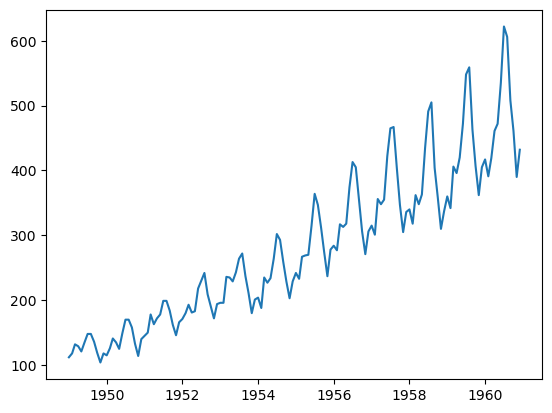

In [41]:
plt.plot(ts)

/tmp/ipykernel_11978/1168954824.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_ano = ts.resample("A").sum()


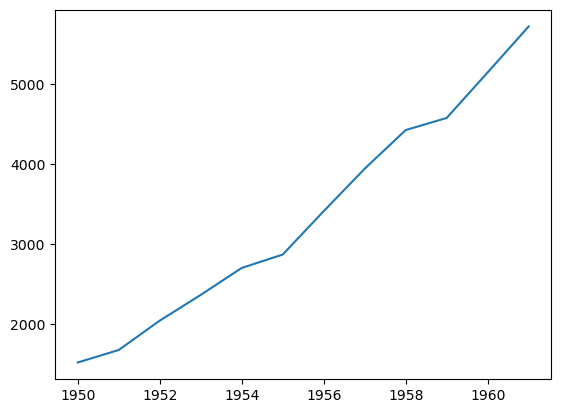

In [44]:
ts_ano = ts.resample("A").sum()
plt.plot(ts_ano)

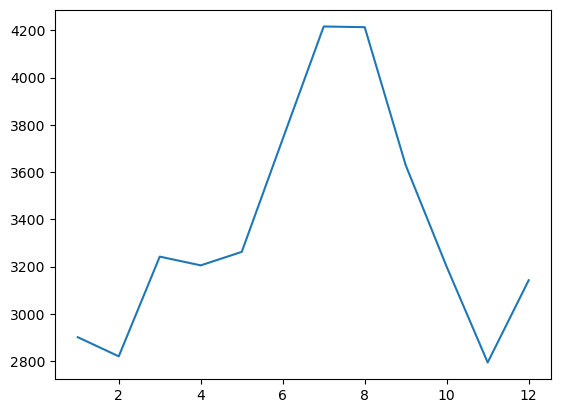

In [46]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

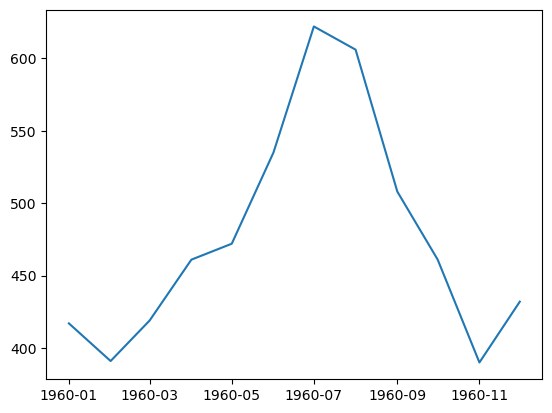

In [47]:
ts_datas = ts[datetime(1960,1,1) : datetime(1960,12,1)]
plt.plot(ts_datas)